## Machine Learning - Training model to check whether Member or Casual 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
# This will ignore the warnings
import warnings
warnings.filterwarnings("ignore")

# Our temporal data types
from datetime import datetime
from datetime import timedelta

#Sci-kit Learn for Machine Learning Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score

t2016Q4 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q4.xlsx',\
                    names=['trip_id','start','end','duration','from','to','user_type'])

t2016Q3 = pd.read_excel('2016_Bike_Share_Toronto_Ridership_Q3.xlsx',
                       names=['trip_id','start','end','duration','from','to','user_type'])

In [2]:
Q3Q4 = pd.concat([t2016Q3,t2016Q4])

In [3]:
Q3Q4['start_month'] = t2016Q3.start.dt.month_name()
months = {'January':1,'February':2,'March':3,'April':4,'May':5,'June':6,\
         'July':7,'August':8,'September':9,'October':10,'November':11,'December':12}
Q3Q4['monthnum'] = Q3Q4['start_month'].apply(lambda x: months[x])

In [4]:
Q3Q4_sorted = Q3Q4.sort_values(by=['monthnum'])
Q3Q4_grp = Q3Q4_sorted.groupby(['monthnum','user_type']).count()
Q3Q4_grp

trip_id   start     end  duration    from      to  \
monthnum user_type                                                      
1        Member           1       1       1         1       1       1   
7        Casual       50649   50649   50649     50649   50648   50649   
         Member      141234  141234  141234    141234  141234  141233   
8        Casual       54873   54873   54873     54873   54873   54872   
         Member      146260  146260  146260    146260  146259  146260   
9        Casual       43316   43316   43316     43316   43315   43315   
         Member      149198  149198  149198    149198  149196  149197   

                    start_month  
monthnum user_type               
1        Member               1  
7        Casual           50649  
         Member          141234  
8        Casual           54873  
         Member          146260  
9        Casual           43316  
         Member          149198

In [5]:
Q3Q4_grp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 7 entries, (1, Member) to (9, Member)
Data columns (total 7 columns):
trip_id        7 non-null int64
start          7 non-null int64
end            7 non-null int64
duration       7 non-null int64
from           7 non-null int64
to             7 non-null int64
start_month    7 non-null int64
dtypes: int64(7)
memory usage: 569.0+ bytes


In [6]:
Q3Q4.head()

,trip_id,start,end,duration,from,to,user_type,start_month,monthnum
0,53279,2016-07-09 01:03:00,2016-07-09 01:15:00,714,Dundas St E / Regent Park Blvd,Danforth Ave / Ellerbeck St,Member,July,7
1,53394,2016-07-09 02:15:00,2016-07-09 02:22:00,417,Riverdale Park North (Broadview Ave),Dundas St E / Regent Park Blvd,Member,July,7
2,58314,2016-07-10 17:04:00,2016-07-10 17:36:00,1904,Dundas St E / Regent Park Blvd,Queen St W / Close Ave,Member,July,7
3,60784,2016-07-11 01:45:00,2016-07-11 01:58:00,784,Union Station,Dundas St E / Regent Park Blvd,Member,July,7
4,93164,2016-07-18 13:35:00,2016-07-18 13:42:00,443,Front St W / Blue Jays Way,Front St / Yonge St (Hockey Hall of Fame),Member,July,7


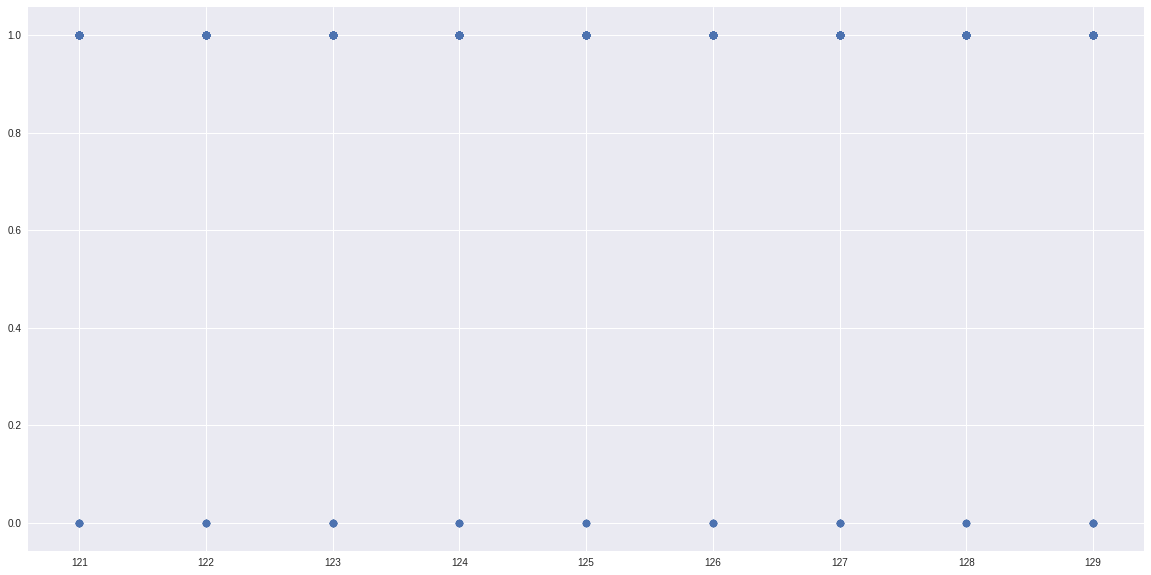

In [7]:
plt.style.use(style='seaborn')
fig, ax = plt.subplots(figsize=(20,10))

X = Q3Q4['duration'][(Q3Q4['duration'] > 120.0) & (Q3Q4['duration'] < 130.0)]
users = {'Casual':0, 'Member':1}
Y = Q3Q4['user_type'][(Q3Q4['duration'] > 120.0) & (Q3Q4['duration'] < 130.0)].apply(lambda x:users[x])
plt.scatter(X,Y);